In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


### testing out camera

In [3]:
cap = cv2.VideoCapture(0)


# Capture frame-by-frame
ret, frame = cap.read()

# Our operations on the frame come here
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the resulting frame
cv2.imshow('frame',gray)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### feature detection inside of function

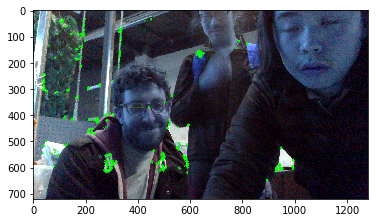

In [5]:
img = cv2.imread('books.jpg')
img = frame

def img_to_features(thisimg):
    gray= cv2.cvtColor(thisimg, cv2.COLOR_BGR2GRAY)

#    orb = cv2.ORB_create(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=1000)
    orb = cv2.ORB_create(nfeatures=1000)

    kp = orb.detect(thisimg)

    img_kp = cv2.drawKeypoints(thisimg, kp, None, color=(0,255,0),  flags=cv2.DrawMatchesFlags_DEFAULT)

    return img_kp

imgkp = img_to_features(img)

plt.figure()
plt.imshow(imgkp)
plt.show()

### Camera loop

In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    imgkp = img_to_features(frame)

    # Display the resulting frame
    cv2.imshow('frame',imgkp)
    

    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the captureqq
cap.release()
cv2.destroyAllWindows()

### finding an image

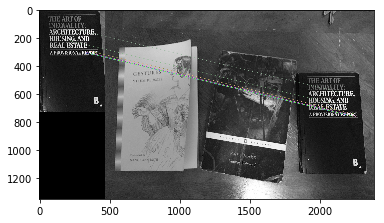

(<matplotlib.image.AxesImage at 0x135c1eb38>, None)

In [121]:
book = cv2.imread('book3.jpg',0)        # this is the object you want to find
frame = cv2.imread('books.jpg',0)        # this is the "bigger picture"

# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(book,None)
kp2, des2 = orb.detectAndCompute(frame,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(book,kp1,frame,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()


### finding an book - live with a camera!

In [136]:
book = cv2.imread('book3.jpg')        # this is the object you want to find

# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=1000)

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(book,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    kp2, des2 = orb.detectAndCompute(frame,None)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    img3 = cv2.drawMatches(book,kp1,frame,kp2,matches[:10],None, flags=2)

#    plt.imshow(img3),plt.show()

#    imgkp = img_to_features(frame)

    # Display the resulting frame
    cv2.imshow('frame',img3)
    

    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the captureqq
cap.release()
cv2.destroyAllWindows()

### camera - making rectangle with mouse

In [162]:

# now let's initialize the list of reference point
temp_point = []
rectangles = []

def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global temp_point, crop, rectangles

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        temp_point = (x, y)

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        if(temp_point):
            # we finish the rectangle
            rectangles.append([temp_point, (x, y)])
        temp_point = None

        for r in rectangles:
        # draw a rectangle around the region of interest
            cv2.rectangle(overlay, r[0], r[1], (0, 255, 0), 2)
#        cv2.imshow("image", image)
        #print(rectangles)

(img_height, img_width) = image.shape[:2]
overlay = np.zeros((img_height, img_width, 3), dtype=np.uint8)
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)

cap = cv2.VideoCapture(0)

alpha = 0.5

while True:
    ret, image = cap.read()

    # display the image and wait for a keypress
    
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        overlay = np.zeros((img_height, img_width, 4), dtype=np.uint8)

    # if the 'c' key is pressed, break from the loop
    if key == ord("c"):
        break
        
        


# close all open windows
cap.release()
cv2.destroyAllWindows() 


### dynamically grab image from rectangle

In [191]:

# now let's initialize the list of reference point
temp_point = []
rectangles = [] 
feature_region = np.zeros((60, 60, 3), dtype=np.uint8)

def new_overlay():
    return np.zeros((img_height, img_width, 3), dtype=np.uint8)

def shape_selection(event, x, y, flags, param):
    global temp_point, crop, rectangles, overlay, feature_region

    # if the left mouse button was clicked, record the starting
    if event == cv2.EVENT_LBUTTONDOWN:
        temp_point = (x, y)

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        if(temp_point):
            rectangles = [[temp_point, (x, y)]] # we only use one for now
            print(rectangles)
            overlay = new_overlay()
        temp_point = None
        
        for r in rectangles:
            print(r[0], r[1])
            feature_region = image[r[0][0]:r[1][0], r[0][1]:r[1][1]]
            print(feature_region)
            cv2.rectangle(overlay, r[0], r[1], (0, 255, 0), 2)

(img_height, img_width) = image.shape[:2]
overlay = new_overlay()
clone = image.copy()

cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)

cap = cv2.VideoCapture(0)

alpha = 0.5

while True:
    ret, image = cap.read()

    # display the image and wait for a keypress
    
    image[50:50+feature_region.shape[0], 50:50+feature_region.shape[1]] = feature_region    
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    
    cv2.imshow("image", image)
    
    
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        overlay = new_overlay()

    # if the 'c' key is pressed, break from the loop
    if key == ord("c"):
        break
        
        


# close all open windows
cap.release()
cv2.destroyAllWindows() 


[[(322, 104), (441, 216)]]
(322, 104) (441, 216)
[[[ 0  6  4]
  [ 0  6  4]
  [ 5  8  6]
  ...
  [ 0  6 24]
  [ 0  6 26]
  [ 0  5 25]]

 [[ 2  8  6]
  [ 0  6  4]
  [ 3  6  4]
  ...
  [ 0  2 19]
  [ 0  4 23]
  [ 0  8 28]]

 [[ 0  3  6]
  [ 0  5  8]
  [ 5  6  5]
  ...
  [ 0  3 20]
  [ 0  2 20]
  [ 0  2 20]]

 ...

 [[ 5  7  2]
  [ 6  8  3]
  [ 9  9  4]
  ...
  [16  9 29]
  [18 12 33]
  [18 12 32]]

 [[ 5  7  2]
  [ 4  6  1]
  [ 8  8  3]
  ...
  [18 10 30]
  [18 12 33]
  [15  9 30]]

 [[10 10  0]
  [ 8  8  0]
  [ 8 10  0]
  ...
  [22 12 30]
  [20 10 32]
  [19 10 30]]]
[[(393, 172), (517, 318)]]
(393, 172) (517, 318)
[[[14 22 32]
  [ 2 10 21]
  [ 6  2  8]
  ...
  [24 34 56]
  [24 35 60]
  [24 36 61]]

 [[12 16 28]
  [12 16 27]
  [18  8 16]
  ...
  [22 34 56]
  [23 37 60]
  [24 38 61]]

 [[10 14 24]
  [ 8 12 24]
  [18  8 16]
  ...
  [22 34 56]
  [20 34 58]
  [23 37 60]]

 ...

 [[12  3 16]
  [13  4 18]
  [19  6 19]
  ...
  [10 30 54]
  [12 30 52]
  [ 5 22 45]]

 [[10  1 14]
  [14  4 18]
  [2

### dynamically grab features from rectangle & match

In [221]:

# now let's initialize the list of reference point
temp_point = []
rectangles = [] 
feature_region = np.zeros((1, 1, 3), dtype=np.uint8)

def new_overlay():
    global frame
    (img_height, img_width) = frame.shape[:2]
    return np.zeros((img_height, img_width, 3), dtype=np.uint8)

def rectangle_creation(event, x, y, flags, param):
    global temp_point, rectangles
    # if the left mouse button was clicked, record the starting
    if event == cv2.EVENT_LBUTTONDOWN:
        temp_point = (x, y)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        if(temp_point):
            rectangles = [[temp_point, (x, y)]] # we only use one for now
            recalculate_region(rectangles[0])    
        temp_point = None
        
def recalculate_region(r):
    global rectangles, overlay, feature_region, frame, kp_fr, des_fr
    
    print(r[0], r[1])
    
    overlay = new_overlay()
    cv2.rectangle(overlay, r[0], r[1], (0, 255, 0), 2)
    
    feature_region = frame[r[0][1]:r[1][1], r[0][0]:r[1][0]]
    
    kp_fr, des_fr = orb.detectAndCompute(feature_region, None)
    
    feature_region = cv2.drawKeypoints(frame[r[0][1]:r[1][1], r[0][0]:r[1][0]], kp_fr, None, color=(0,255,0),  flags=cv2.DrawMatchesFlags_DEFAULT)

    
    
        
##############



kp_fr = None
des_fr = None

overlay = new_overlay()

cv2.namedWindow("image")
cv2.setMouseCallback("image", rectangle_creation)

cap = cv2.VideoCapture(0)

alpha = 0.5


# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=2000)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

cap = cv2.VideoCapture(0)

### LOOOP

while True:
    ret, frame = cap.read()

    kp, des = orb.detectAndCompute(frame,None)

    if(np.any(des_fr)):
        # Match descriptors.
        matches = bf.match(des_fr, des)

        # Sort them in the order of their distance.
        matches = sorted(matches, key = lambda x:x.distance)

        # Draw first 10 matches.
        frame = cv2.drawMatches(feature_region,kp_fr,frame,kp,matches[:20],None, flags=2)

    
    # picture in picture
#    frame[50:50+feature_region.shape[0], 50:50+feature_region.shape[1]] = feature_region    
#    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)
    
    # display the image and wait for a keypress
    cv2.imshow("image", frame)
    
    
    key = cv2.waitKey(1) & 0xFF
    # press 'r' to reset the window
    if key == ord("r"):
        overlay = new_overlay()
    # if the 'c' key is pressed, break from the loop
    if key == ord("c"):
        break
        
# close all open windows
cap.release()
cv2.destroyAllWindows() 


(546, 161) (846, 419)


### dynamically grab features from rectangle & match BETTER

In [9]:

# now let's initialize the list of reference point
temp_point = []
rectangles = [] 
feature_region = np.zeros((1, 1, 3), dtype=np.uint8)

def new_overlay():
    global frame
    (img_height, img_width) = frame.shape[:2]
    return np.zeros((img_height, img_width, 3), dtype=np.uint8)

def rectangle_creation(event, x, y, flags, param):
    global temp_point, rectangles
    # if the left mouse button was clicked, record the starting
    if event == cv2.EVENT_LBUTTONDOWN:
        temp_point = (x, y)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        if(temp_point):
            rectangles = [[temp_point, (x, y)]] # we only use one for now
            recalculate_region(rectangles[0])    
        temp_point = None
        
def recalculate_region(r):
    global rectangles, overlay, feature_region, frame, kp_fr, des_fr
    
    print(r[0], r[1])
    
    overlay = new_overlay()
    cv2.rectangle(overlay, r[0], r[1], (0, 255, 0), 2)
    
    feature_region = frame[r[0][1]:r[1][1], r[0][0]:r[1][0]]
    
    kp_fr, des_fr = orb.detectAndCompute(feature_region, None)
    
    feature_region = cv2.drawKeypoints(frame[r[0][1]:r[1][1], r[0][0]:r[1][0]], kp_fr, None, color=(0,255,0),  flags=cv2.DrawMatchesFlags_DEFAULT)

    
    
        
##############



kp_fr = None
des_fr = None

overlay = new_overlay()

cv2.namedWindow("image")
cv2.setMouseCallback("image", rectangle_creation)

cap = cv2.VideoCapture(0)

alpha = 0.5


# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=2000)

# create BFMatcher object
bf = cv2.BFMatcher()

cap = cv2.VideoCapture(0)

### LOOOP

while True:
    ret, frame = cap.read()

    kp, des = orb.detectAndCompute(frame,None)

    if(np.any(des_fr)):
        # Match descriptors.
        matches = bf.knnMatch(des_fr, des, k=2)

        # Sort them in the order of their distance.
        
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])

                

                
        # Draw first 10 matches.
        frame = cv2.drawMatchesKnn(feature_region,kp_fr,frame,kp,good,None, flags=2)

    
    # picture in picture
#    frame[50:50+feature_region.shape[0], 50:50+feature_region.shape[1]] = feature_region    
#    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)
    
    # display the image and wait for a keypress
    cv2.imshow("image", frame)
    
    
    key = cv2.waitKey(1) & 0xFF
    # press 'r' to reset the window
    if key == ord("r"):
        overlay = new_overlay()
    # if the 'c' key is pressed, break from the loop
    if key == ord("c"):
        break
        
# close all open windows
cap.release()
cv2.destroyAllWindows() 


AttributeError: 'NoneType' object has no attribute 'shape'

### dynamically grab features from rectangle & match BETTER & project shape


In [253]:

# now let's initialize the list of reference point
temp_point = []
rectangles = [] 
feature_region = np.zeros((1, 1, 3), dtype=np.uint8)

def new_overlay():
    global frame
    (img_height, img_width) = frame.shape[:2]
    return np.zeros((img_height, img_width, 3), dtype=np.uint8)

def rectangle_creation(event, x, y, flags, param):
    global temp_point, rectangles
    # if the left mouse button was clicked, record the starting
    if event == cv2.EVENT_LBUTTONDOWN:
        temp_point = (x, y)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        if(temp_point):
            rectangles = [[temp_point, (x, y)]] # we only use one for now
            recalculate_region(rectangles[0])    
        temp_point = None
        
def recalculate_region(r):
    global rectangles, overlay, feature_region, frame, kp_fr, des_fr
    
    print(r[0], r[1])
    
    overlay = new_overlay()
    cv2.rectangle(overlay, r[0], r[1], (0, 255, 0), 2)
    
    feature_region = frame[r[0][1]:r[1][1], r[0][0]:r[1][0]]
    
    kp_fr, des_fr = orb.detectAndCompute(feature_region, None)
    
    feature_region = cv2.drawKeypoints(frame[r[0][1]:r[1][1], r[0][0]:r[1][0]], kp_fr, None, color=(0,255,0),  flags=cv2.DrawMatchesFlags_DEFAULT)

    
    
        
##############



kp_fr = None
des_fr = None

overlay = new_overlay()

cv2.namedWindow("image")
cv2.setMouseCallback("image", rectangle_creation)

cap = cv2.VideoCapture(0)

alpha = 0.5


# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=2000)

# create BFMatcher object
#bf = cv2.BFMatcher()

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

cap = cv2.VideoCapture(0)


MIN_MATCH_COUNT = 10

### LOOOP

while True:
    ret, frame = cap.read()

    kp, des = orb.detectAndCompute(frame,None)

    if(np.any(des_fr)):
        # Match descriptors.
        #matches = flann.knnMatch(des_fr, des, k=2)
        matches= flann.knnMatch(np.asarray(des_fr,np.float32),np.asarray(des,np.float32), k=2)

        # Sort them in the order of their distance.
        
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])


        if len(good)>MIN_MATCH_COUNT:

            src_pts = np.float32([ kp_fr[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
            matchesMask = mask.ravel().tolist()

            h,w = feature_region.shape[:2]
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)

            frame = cv2.polylines(frame,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        else:
            print("Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))
            matchesMask = None
             
                
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
           singlePointColor = None,
           matchesMask = matchesMask, # draw only inliers
           flags = 2)

        # Draw first 10 matches.
        frame = cv2.drawMatchesKnn(feature_region,kp_fr,frame,kp,good,None, **draw_params)

    
    # picture in picture
#    frame[50:50+feature_region.shape[0], 50:50+feature_region.shape[1]] = feature_region    
#    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)
    
    # display the image and wait for a keypress
    cv2.imshow("image", frame)
    
    
    key = cv2.waitKey(1) & 0xFF
    # press 'r' to reset the window
    if key == ord("r"):
        overlay = new_overlay()
    # if the 'c' key is pressed, break from the loop
    if key == ord("c"):
        break
        
# close all open windows
cap.release()
cv2.destroyAllWindows() 


(604, 230) (819, 582)
Not enough matches are found - 10/10
Not enough matches are found - 7/10
Not enough matches are found - 4/10
Not enough matches are found - 9/10
Not enough matches are found - 5/10
Not enough matches are found - 2/10
Not enough matches are found - 1/10
Not enough matches are found - 6/10
Not enough matches are found - 4/10
Not enough matches are found - 5/10
Not enough matches are found - 7/10
Not enough matches are found - 3/10
Not enough matches are found - 4/10
Not enough matches are found - 0/10
Not enough matches are found - 2/10
Not enough matches are found - 1/10
Not enough matches are found - 1/10
Not enough matches are found - 1/10
Not enough matches are found - 1/10
Not enough matches are found - 3/10
Not enough matches are found - 1/10
Not enough matches are found - 0/10
Not enough matches are found - 1/10
Not enough matches are found - 3/10
Not enough matches are found - 3/10
Not enough matches are found - 2/10
Not enough matches are found - 3/10
Not e

SystemError: <built-in function drawMatchesKnn> returned NULL without setting an error